In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy

Loading & prepping the dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# reshaping
X_train = X_train.reshape(len(X_train), 32, 32, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 32, 32, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# normalising the rgb values like 255 to something between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train[1,:]
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


The model

In [5]:
model = Sequential()

# 32 filters and 3x3
model.add(Conv2D(32, (3,3), activation= "relu", input_shape= (32, 32, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation= "relu"))
model.add(MaxPooling2D(2,2))

# converts a multidimensional vector into a single dimensional vector
model.add(Flatten())

# hidden layer and output layer with 64 and 10 neurons respectively
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model Compile

In [6]:
# for loss function sparse_categorical_crossentropy is better than categorical_crossentropy refer below for explanation
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"])

When we use the image loading method described here, the tf.keras.utils.image_dataset_from_directory utility, it will automatically read images and create a dataset and labels.

According to tf.keras.utils.image_dataset_from_directory documentation, it supports four types of label_mode:

'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
None (no labels).
'int' seems to be the default label_mode. So, by default, tf.keras.utils.image_dataset_from_directory will create a set of labels for the dataset as scalars that go from 1 to the number of classes in the dataset.
In this case, the model should be compiled with a 'sparse_categorical_crossentropy' loss.

If we want to use one-hot encoded labels, set label_mode to 'categorical' in the call to tf.keras.utils.image_dataset_from_directory, then compile the model with a 'categorical_crossentropy' loss.

Model Training/Fitting

In [17]:
# apparently a higher batch size causes it to over fit
model.fit(X_train, Y_train, epochs= 20, batch_size= 64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9802 - loss: 0.0585
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9954 - loss: 0.0233
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9961 - loss: 0.0204
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9742 - loss: 0.0736
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9814 - loss: 0.0535
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9767 - loss: 0.0668
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9771 - loss: 0.0667
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9878 - loss: 0.0370
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9831 - loss: 0.0520
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9725 - loss: 0.0757
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9819 - loss: 0.0496
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

Model Evaluation

In [29]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6507 - loss: 4.2473


[4.297194480895996, 0.6482999920845032]

Prediction for random image

In [30]:
import random
import matplotlib.pyplot as plt

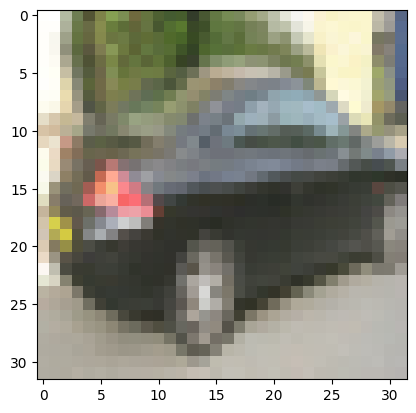

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
That is a automobile


In [40]:

id = random.randint(0, len(X_test))
random_image = X_test[id,:]

plt.imshow(random_image)
plt.show()

num_classes = 10
output_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

prediction = model.predict(random_image.reshape(1, 32, 32, 3))

# Assuming prediction is a numpy array
predicted_class = numpy.argmax(prediction)  # Get the index of the highest probability
probability = prediction[0, predicted_class]  # Get the probability of the predicted class

print(f"That is a {output_class[predicted_class]}")